In [1]:
import pandas as pd

In [2]:
approved_building_pd = pd.read_csv('./data/cleanedData/approved_building permits_data.csv')

/var/folders/76/nl0cv1f13kn7tkq8w6crqqm00000gn/T/ipykernel_32433/2721364605.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  approved_building_pd = pd.read_csv('./data/cleanedData/approved_building permits_data.csv')


In [3]:
approved_building_pd = approved_building_pd.dropna(subset=['zip'])

In [4]:
approved_building_pd['zip'] = approved_building_pd['zip'].replace({'00008': '02135', '01803': '02135', '08091': '02131'})

In [5]:
approved_building_pd['zip'] = approved_building_pd['zip'].astype(str).str.split('.').str[0].str.zfill(5)
import pandas as pd

approved_building_pd['zip'] = approved_building_pd['zip'].astype(str).str.split('-').str[0].str.zfill(5)

approved_building_pd['issued_date'] = pd.to_datetime(approved_building_pd['issued_date']).dt.date
approved_building_pd['expiration_date'] = pd.to_datetime(approved_building_pd['expiration_date']).dt.date


In [6]:
neighborhood_zip_map = {
    'Allston/Brighton': ['02134', '02135', '02163'],
    'Back Bay/Beacon Hill': ['02108', '02116', '02117', '02123', '02133', '02199', '02216', '02217', '02295'],
    'Central Boston': [
        '02101', '02102', '02103', '02104', '02105', '02106', '02107', '02109', '02110', '02111',
        '02112', '02113', '02114', '02196', '02201', '02202', '02203', '02204', '02205', '02206',
        '02207', '02208', '02209', '02211', '02212', '02222', '02293'
    ],
    'Charlestown': ['02129'],
    'Dorchester': ['02122', '02124', '02125'],
    'East Boston': ['02128', '02228'],
    'Fenway/Kenmore': ['02115', '02215'],
    'Hyde Park': ['02136'],
    'Jamaica Plain': ['02130'],
    'Mattapan': ['02126'],
    'Roslindale': ['02131'],
    'Roxbury': ['02119', '02120', '02121'],
    'South Boston': ['02127', '02210', '02219'],
    'South End': ['02118'],
    'West Roxbury': ['02132'],
    'Dedham':['02026', '02137'],
    ' Brookline':['02445', '02446', '02467', '02146'],
    'Newton':['02458'],
    ' Hingham':['02018'],
    'Milton':['02186'],
    'Westwood':['02090']
}

zip_neighborhood_map = {zip_code: neighborhood for neighborhood, zip_codes in neighborhood_zip_map.items() for zip_code in zip_codes}

approved_building_pd['neighborhood'] = approved_building_pd['zip'].map(zip_neighborhood_map)


In [7]:
approved_building_pd.head()

,_id,permitnumber,worktype,permittypedescr,issued_date,expiration_date,status,address,city,zip,occupancytype,declared_valuation,neighborhood
0,549377,SF48002,INTEXT,Short Form Bldg Permit,2010-10-29,2011-04-29,Open,2 Copps Hill TE,North End,02113,1-3FAM,4500.0,Central Boston
1,451679,SF105658,EXTREN,Short Form Bldg Permit,2011-11-16,2012-05-16,Open,2 Copps Hill TE,North End,02113,Multi,20000.0,Central Boston
2,513033,SF20887,EXTREN,Short Form Bldg Permit,2010-04-07,2010-10-07,Open,2 Copps Hill TE,North End,02113,1-3FAM,7000.0,Central Boston
3,24400,ALT3406,EXTREN,Long Form/Alteration Permit,2010-04-05,2010-10-05,Open,20 Mystic ST,CHARLESTOWN,02129,1-3FAM,0.0,Charlestown
4,319516,G16827,COB,Gas Permit,2010-03-05,2010-09-05,Open,82 WALFORD WY,CHARLESTOWN,02129,7More,2334.0,Charlestown


In [8]:
status_list = approved_building_pd['status'].unique().tolist()
print(status_list)

['Open', 'Closed', 'Stop Work']


In [9]:
approved_building_pd.columns

Index(['_id', 'permitnumber', 'worktype', 'permittypedescr', 'issued_date',
       'expiration_date', 'status', 'address', 'city', 'zip', 'occupancytype',
       'declared_valuation', 'neighborhood'],
      dtype='object')

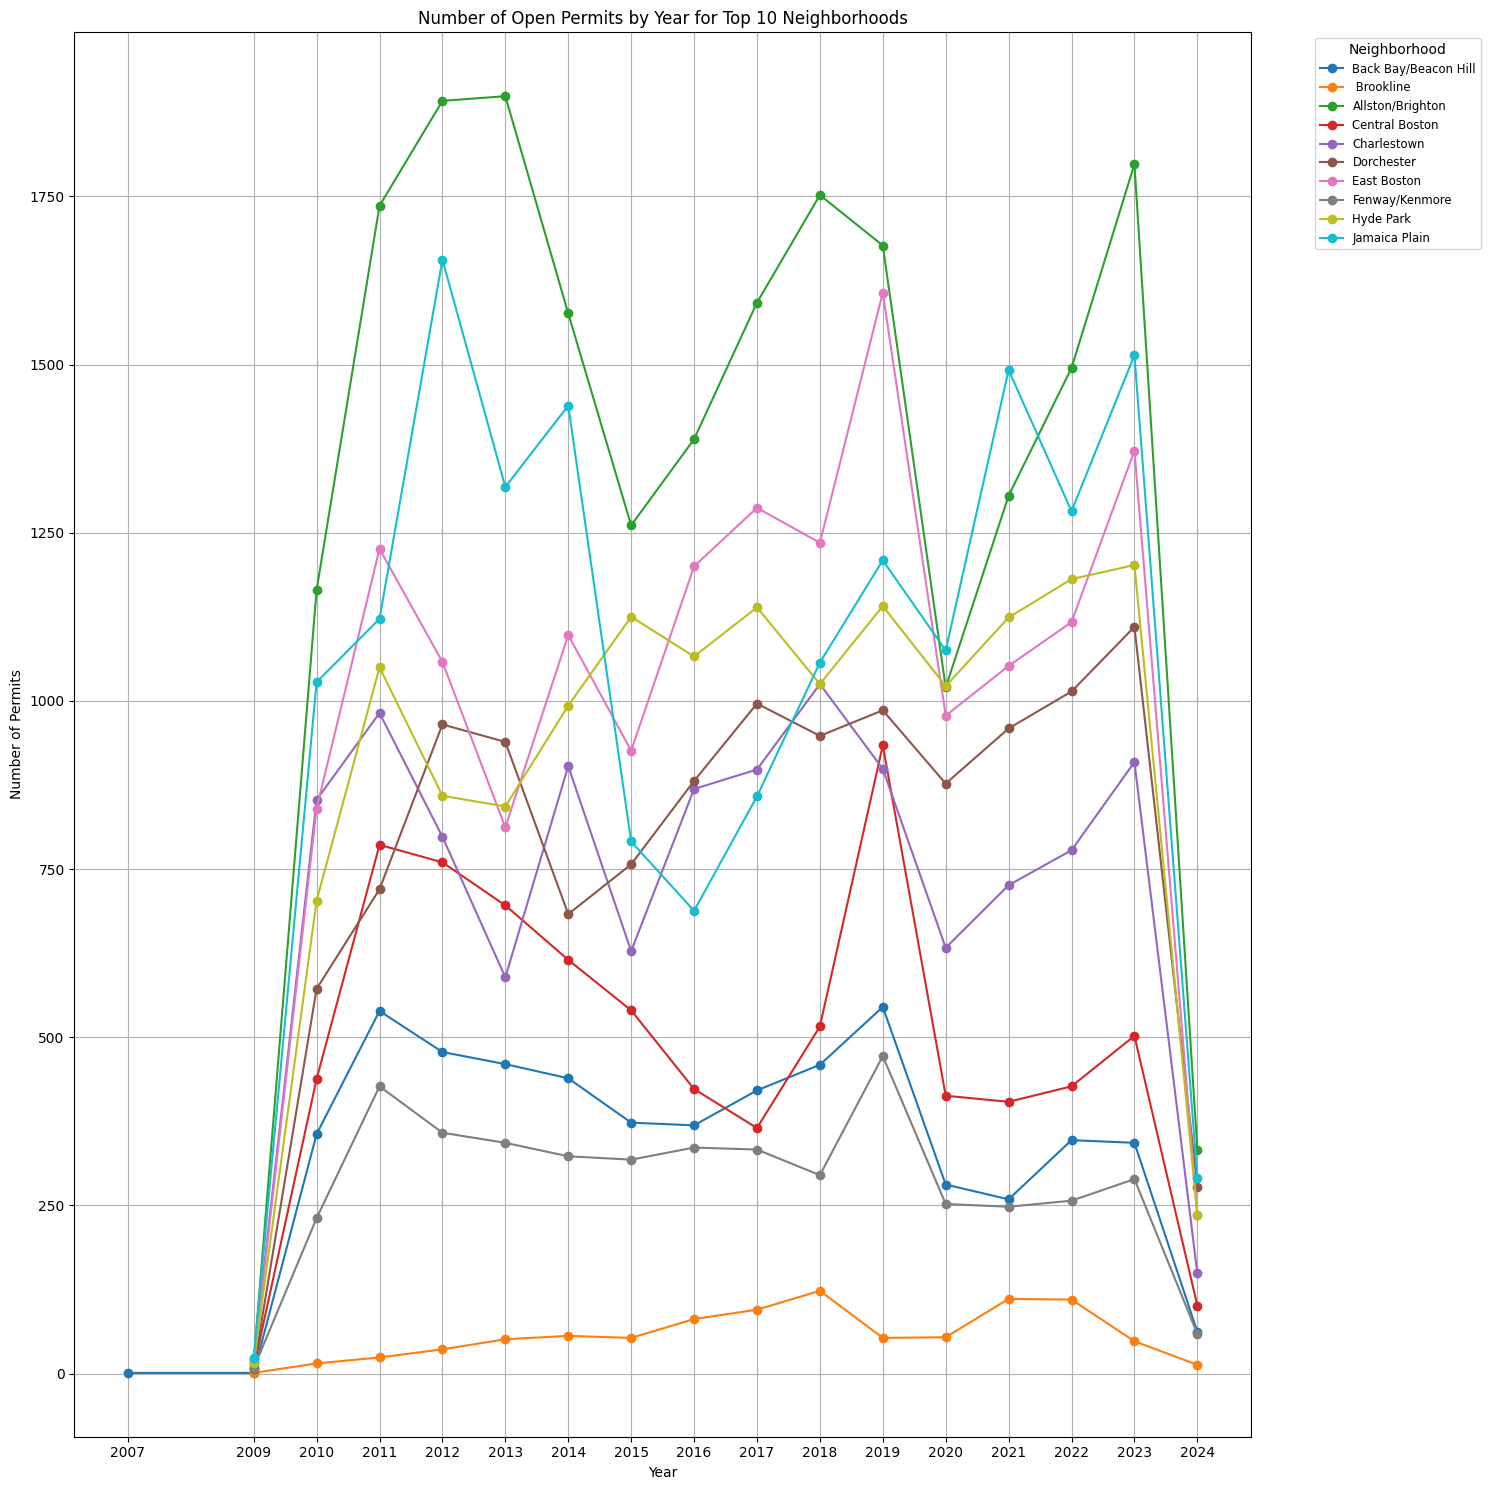

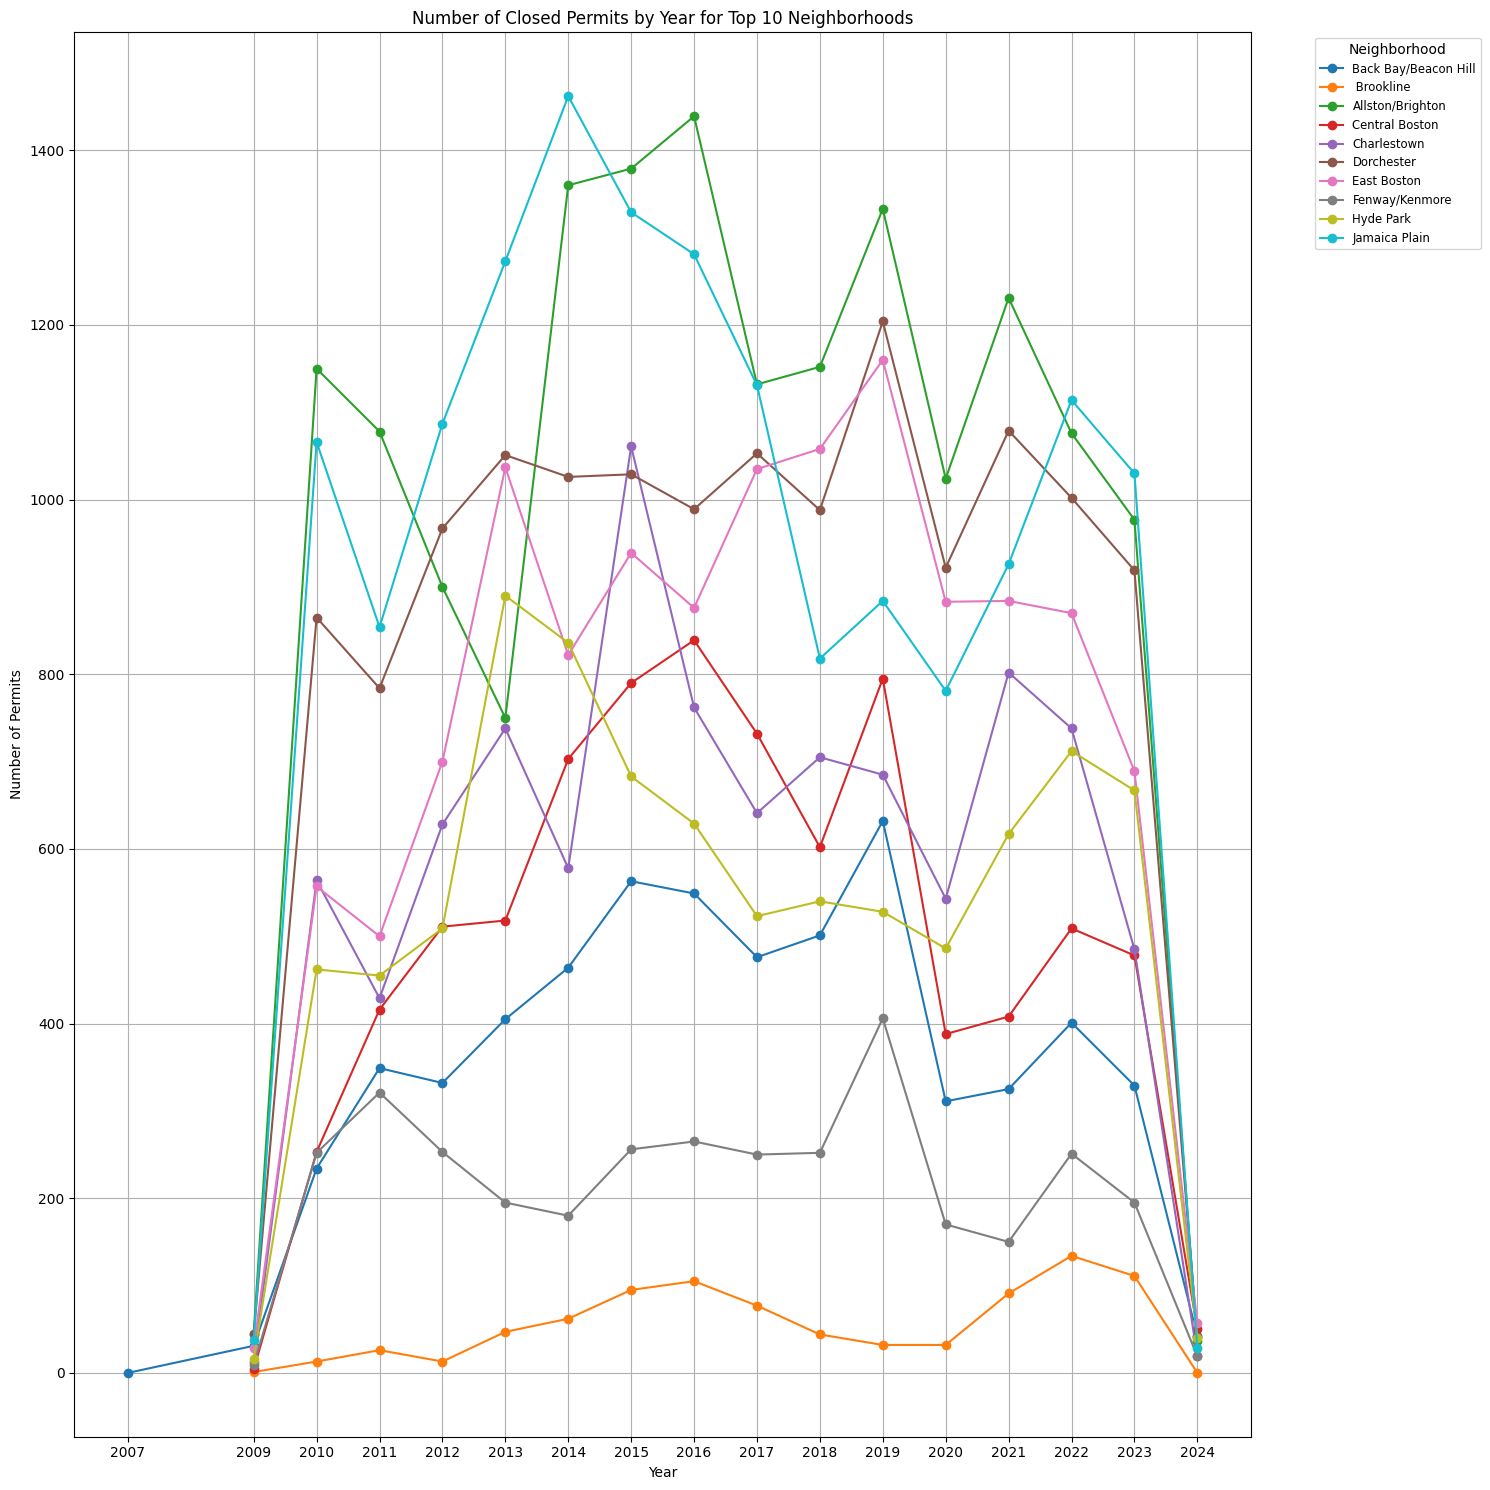

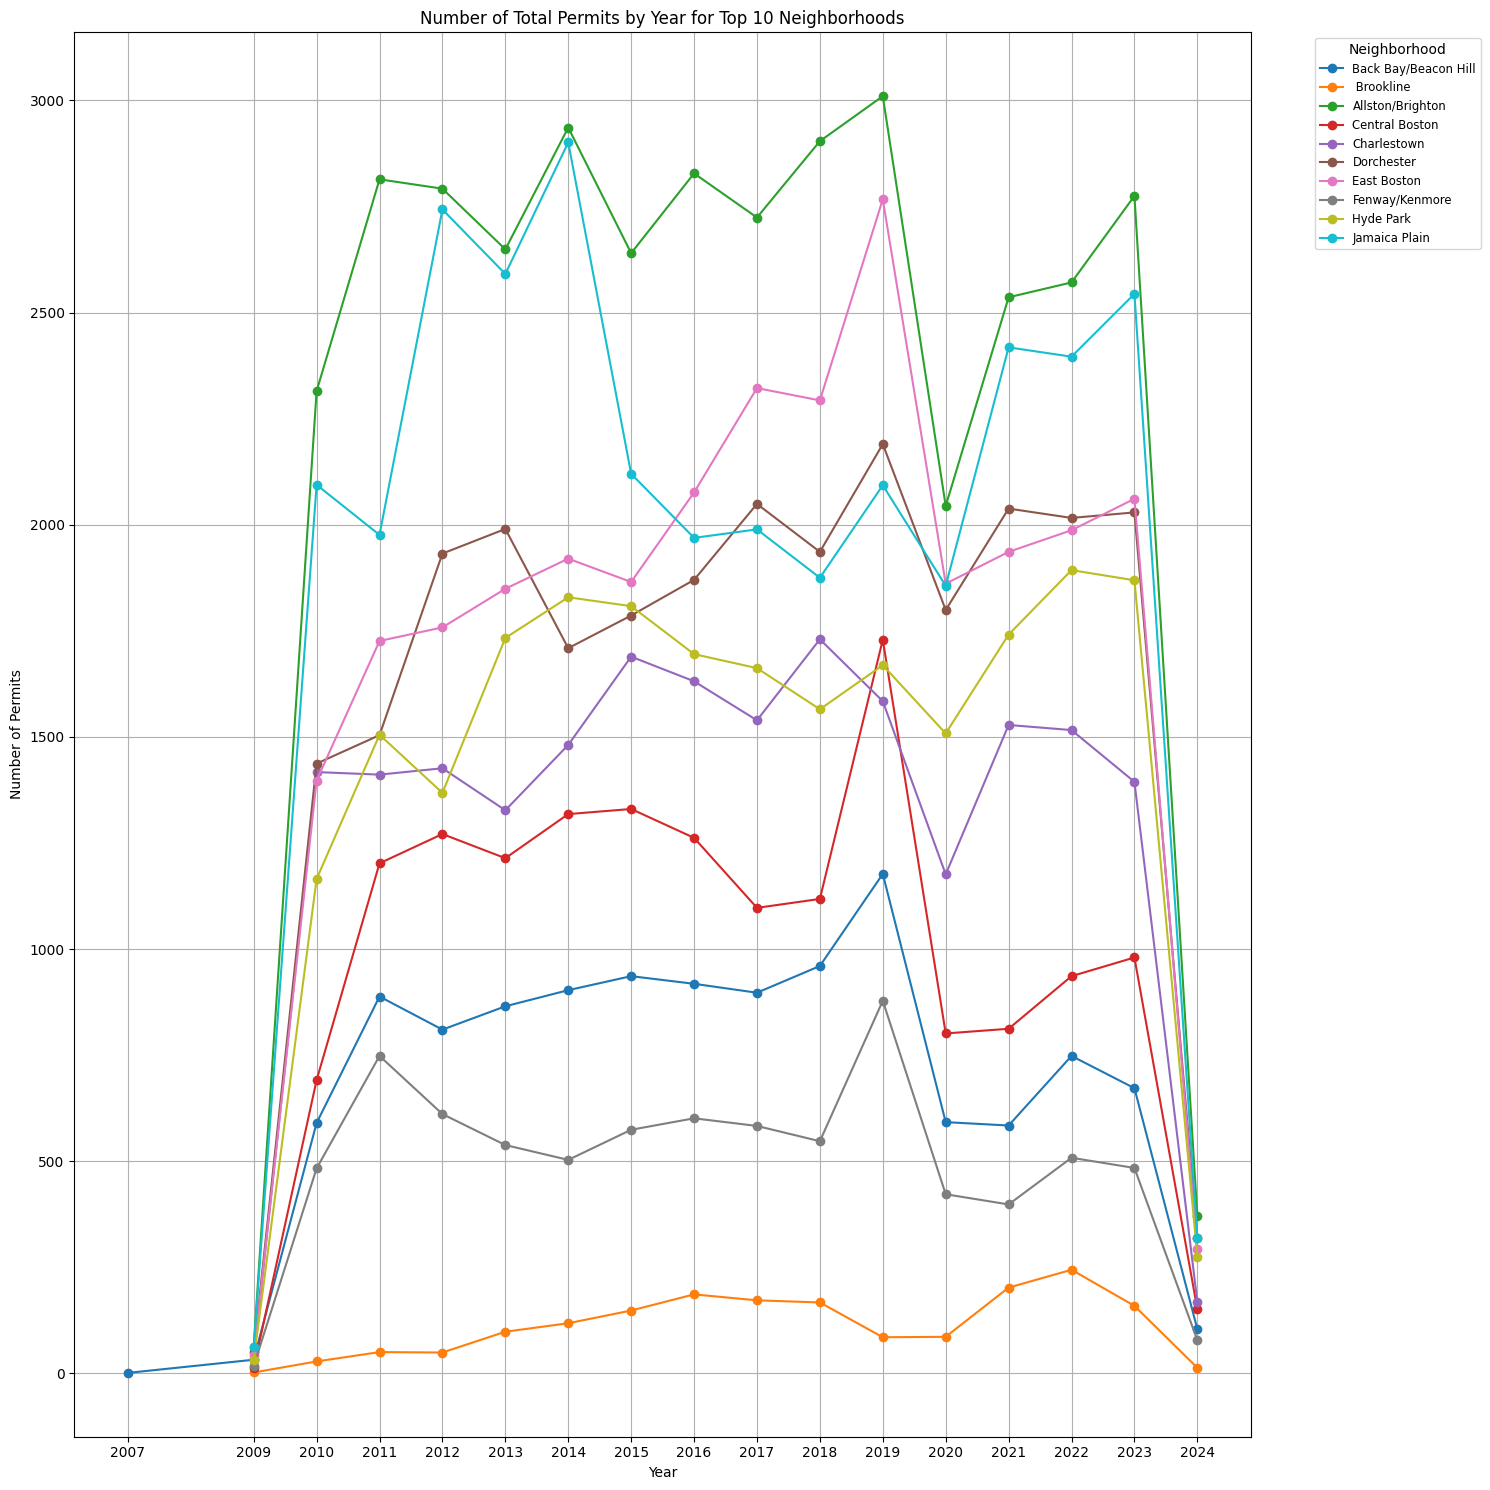

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 approved_building_pd 是你的 DataFrame
approved_building_pd['year'] = pd.to_datetime(approved_building_pd['issued_date']).dt.year

filtered_df = approved_building_pd[approved_building_pd['status'].isin(['Open', 'Closed'])]

# 按 'year', 'neighborhood', 和 'status' 分组计算数量
grouped = filtered_df.groupby(['year', 'neighborhood', 'status']).size().unstack(fill_value=0).reset_index()

# 计算 'Open' 和 'Closed' 的总和
grouped['Total'] = grouped['Open'] + grouped['Closed']

# 修改的绘图函数，仅为前10个 neighborhood 绘图
def plot_status_by_year(data, status, top_n=10):
    plt.figure(figsize=(15, 15))
    unique_years = sorted(data['year'].unique())
    top_neighborhoods = data['neighborhood'].unique()[:top_n]  # 选择前10个 neighborhood

    for neighborhood in top_neighborhoods:
        subset = data[data['neighborhood'] == neighborhood]
        plt.plot(subset['year'], subset[status], marker='o', linestyle='-', label=str(neighborhood))

    plt.title(f'Number of {status} Permits by Year for Top {top_n} Neighborhoods')
    plt.xlabel('Year')
    plt.ylabel('Number of Permits')
    plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)  # Optional: Adds a grid for easier reading
    plt.xticks(unique_years, labels=[str(year) for year in unique_years])
    plt.tight_layout()
    plt.show()

# 确保 neighborhood 按照你希望的顺序排序，如果需要特定的排序，请先对 grouped 进行排序
# 分别为 'Open', 'Closed', 和 'Total' 状态绘图，仅限前10个 neighborhood
plot_status_by_year(grouped, 'Open')
plot_status_by_year(grouped, 'Closed')
plot_status_by_year(grouped, 'Total')
